In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
whole_data = pd.read_csv("train.csv")

In [3]:
whole_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [4]:
whole_data.shape

(11504798, 12)

In [5]:
data = whole_data[:5_000_000].copy()

In [6]:
data.shape

(5000000, 12)

In [7]:
data.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [8]:
for col_name in data.columns:
    if data.dtypes[col_name] == 'O':
        print(col_name, data[col_name].unique())

Gender ['Male' 'Female']
Vehicle_Age ['1-2 Year' '> 2 Years' '< 1 Year']
Vehicle_Damage ['Yes' 'No']


In [9]:
data["Gender"] = data["Gender"].apply(lambda line: 0 if line == "Female" else 1).values
data["Vehicle_Damage"] = data["Vehicle_Damage"].apply(lambda line: 0 if line == "No" else 1).values
# data = data.drop(columns=["Gender", "Vehicle_Damage"])


In [10]:
for col_name in data.columns:
    if data.dtypes[col_name] == 'float64':
        print(col_name, (data[col_name] - data[col_name].apply(int)).sum())

Region_Code 0.0
Annual_Premium 0.0
Policy_Sales_Channel 0.0


In [11]:
for col_name in data.columns:
    if data.dtypes[col_name] == 'float64':
        data[col_name] = data[col_name].apply(int)

In [12]:
data.dtypes

id                       int64
Gender                   int64
Age                      int64
Driving_License          int64
Region_Code              int64
Previously_Insured       int64
Vehicle_Age             object
Vehicle_Damage           int64
Annual_Premium           int64
Policy_Sales_Channel     int64
Vintage                  int64
Response                 int64
dtype: object

In [13]:
dummy_car_age = pd.get_dummies(data['Vehicle_Age'], drop_first=True, prefix='Vehicle_Age')
data = pd.concat([data, dummy_car_age], axis=1)
data = data.drop(columns=["Vehicle_Age"])

<Axes: >

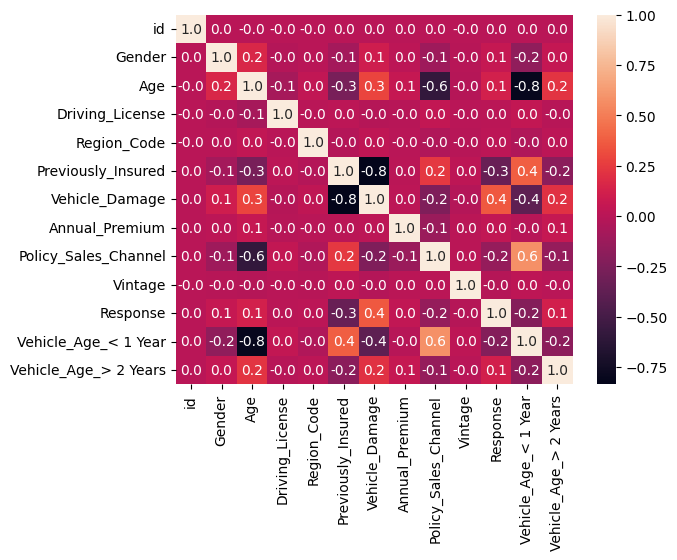

In [14]:
sns.heatmap(data.corr(), annot=True, fmt=".1f")

In [15]:
print("total peoples without licenses : ", data["Driving_License"].count() - data["Driving_License"].sum(),
"\npeoples without license who 'response'", data[data["Driving_License"] == 0]["Response"].sum())

total peoples without licenses :  9868 
peoples without license who 'response' 530


In [16]:
# useless_data = 
corr_matrix = data.corr()
usefull_cols = corr_matrix["Response"][abs(corr_matrix["Response"]) > 0.05].index
usefull_cols = list(usefull_cols) + ["Driving_License"]

In [17]:
filtered_data = data.drop(columns=[col for col in data.columns if col not in usefull_cols])

In [18]:
filtered_data.head()

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Policy_Sales_Channel,Response,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,21,1,0,1,124,0,False,False
1,1,43,1,0,1,26,1,False,True
2,0,25,1,1,0,152,0,True,False
3,0,35,1,0,1,156,0,False,False
4,0,36,1,1,0,152,0,False,False


<Axes: xlabel='Age', ylabel='Count'>

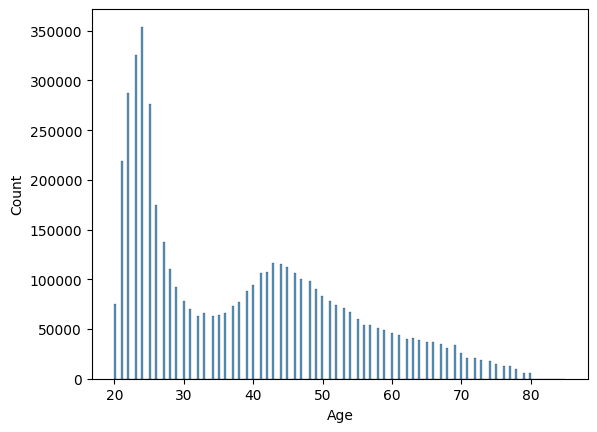

In [19]:
sns.histplot((filtered_data["Age"]))

<Axes: xlabel='Policy_Sales_Channel', ylabel='Count'>

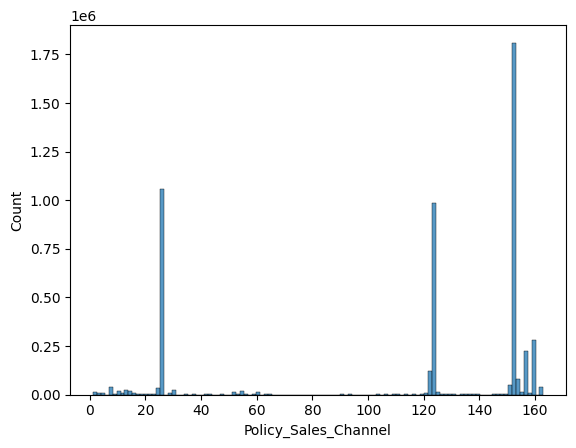

In [20]:
sns.histplot(filtered_data["Policy_Sales_Channel"])

In [21]:
filtered_data["Policy_Sales_Channel_Small"] = filtered_data["Policy_Sales_Channel"].apply(lambda val : 1 if val < 80 else 0)
# filtered_data["Policy_Sales_Channel_Middle"] = filtered_data["Policy_Sales_Channel"].apply(lambda val : 1 if val >= 80 and val < 140 else 0)
filtered_data["Policy_Sales_Channel_Large"] = filtered_data["Policy_Sales_Channel"].apply(lambda val : 1 if val > 140 else 0)
filtered_data = filtered_data.drop(columns=["Policy_Sales_Channel"])

In [22]:
filtered_data.head()

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Response,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Policy_Sales_Channel_Small,Policy_Sales_Channel_Large
0,1,21,1,0,1,0,False,False,0,0
1,1,43,1,0,1,1,False,True,1,0
2,0,25,1,1,0,0,True,False,0,1
3,0,35,1,0,1,0,False,False,0,1
4,0,36,1,1,0,0,False,False,0,1


In [23]:
# experimental
# process age into 3 groups (< 35, 35 - 55, > 55)

<Axes: xlabel='Age', ylabel='Count'>

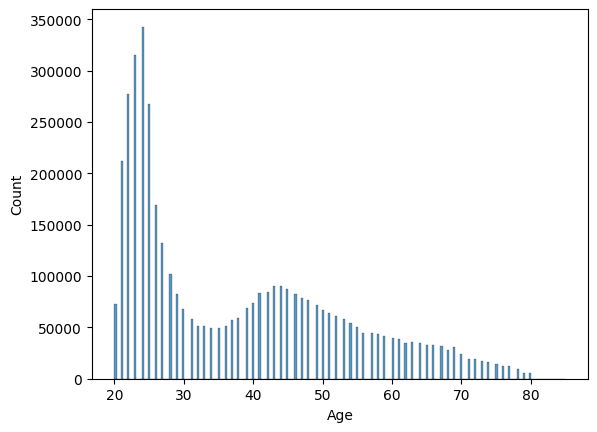

In [24]:
sns.histplot((filtered_data[filtered_data["Response"] == 0]["Age"]))

<Axes: xlabel='Age', ylabel='Count'>

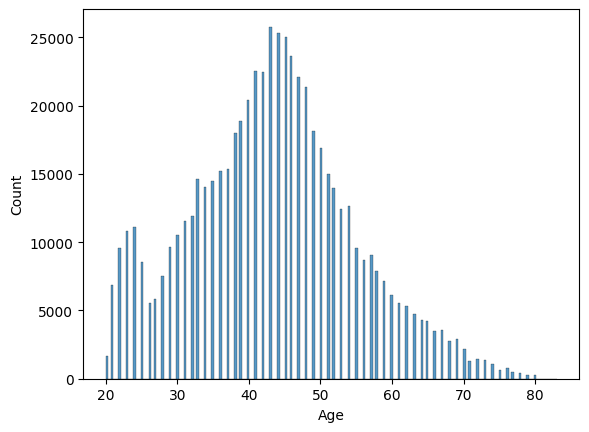

In [25]:
sns.histplot((filtered_data[filtered_data["Response"] == 1]["Age"]))


In [26]:


majority_class = filtered_data[filtered_data['Response'] == 0]
minority_class = filtered_data[filtered_data['Response'] == 1]
sample_size = len(minority_class)
majority_sample = majority_class.sample(sample_size)
X = pd.concat([majority_sample, minority_class], axis=0)
X.columns = filtered_data.columns
print("New shape of training data: ", X.shape)



New shape of training data:  (1230562, 10)


<Axes: xlabel='Age', ylabel='Count'>

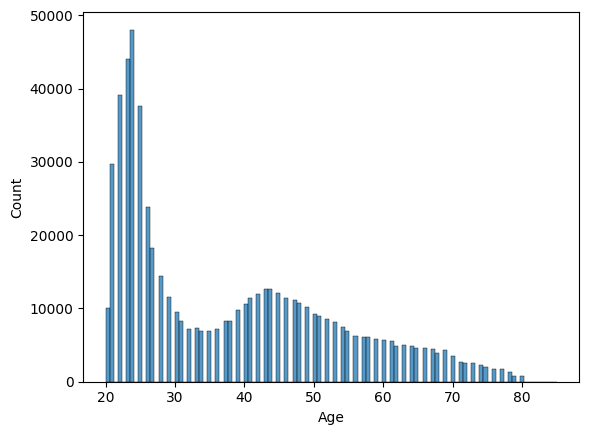

In [27]:
sns.histplot((X[X["Response"] == 0]["Age"]))


<Axes: xlabel='Age', ylabel='Count'>

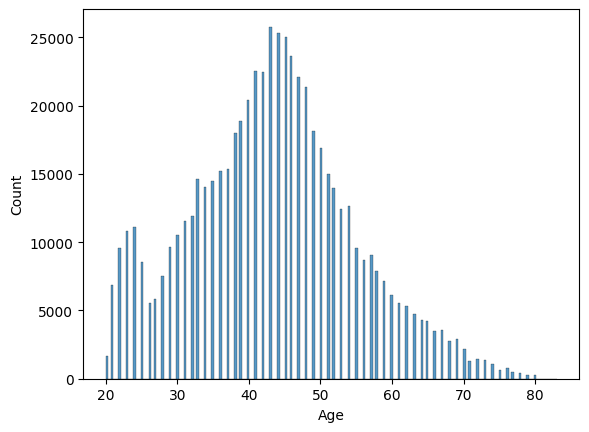

In [28]:
sns.histplot((X[X["Response"] == 1]["Age"]))


In [39]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


### То, что я смог напедалить сам

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X.drop(columns="Response"), X["Response"], test_size=0.33, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(filtered_data.drop(columns="Response"), filtered_data["Response"], test_size=0.33, random_state=42)

In [37]:
y_train.value_counts()

Response
0    412324
1    412152
Name: count, dtype: int64

In [38]:
y_test.value_counts()


Response
1    203129
0    202957
Name: count, dtype: int64

In [39]:
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
sgd = SGDClassifier(loss="log_loss")
sgd.fit(X_train, y_train)

SGDClassifier(loss='log_loss')

In [40]:
pred = sgd.predict(X_test)
print("f1 score = ", f1_score(y_test, pred, average='weighted'))
print("recall = ", recall_score(y_test, pred, average='weighted'))

f1 score =  0.7783233371197092
recall =  0.786769305024059


In [41]:
lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train, y_train)

/home/dr_drew/Projects/ML/lab_1/binary_classification_with_api/server/server_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [42]:
pred = lr.predict(X_test)
print("f1 score = ", f1_score(y_test, pred, average='weighted'))
print("recall = ", recall_score(y_test, pred, average='weighted'))

f1 score =  0.776525728106022
recall =  0.7844225114877145


In [43]:
sc = StandardScaler()
lr = LogisticRegression(class_weight='balanced')
lr.fit(sc.fit_transform(X_train), y_train)
pred = lr.predict(sc.transform(X_test))
print("f1 score = ", f1_score(y_test, pred, average='weighted'))
print("recall = ", recall_score(y_test, pred, average='weighted'))

f1 score =  0.7759589486256057
recall =  0.7837773279551622


In [44]:
dtc = DecisionTreeClassifier(class_weight='balanced')
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
print("f1 score = ", f1_score(y_test, pred, average='weighted'))
print("recall = ", recall_score(y_test, pred, average='weighted'))

f1 score =  0.7961223261193093
recall =  0.7997000635333402


In [47]:
print("f1 score = ", f1_score(y_test, pred))
print("recall = ", recall_score(y_test, pred))

f1 score =  0.8231626319393867
recall =  0.9319841086206302


In [31]:
dtc = DecisionTreeClassifier(class_weight='balanced', criterion='log_loss')
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
print("f1 score = ", f1_score(y_test, pred, average='weighted'))
print("recall = ", recall_score(y_test, pred, average='weighted'))

f1 score =  0.7969078533908943
recall =  0.8004092729126343


In [43]:
rfc = RandomForestClassifier(class_weight='balanced', criterion = "entropy", n_estimators=1000)
rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)
print("f1 score = ", f1_score(y_test, pred, average='weighted'))
print("recall = ", recall_score(y_test, pred, average='weighted'))

f1 score =  0.7969584940561791
recall =  0.8004363607708712


### Чекпоинт

In [66]:
# X_train, X_test, y_train, y_test = train_test_split(filtered_data.drop(columns="Response"), filtered_data["Response"], test_size=0.33, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X.drop(columns="Response"), X["Response"], test_size=0.33, random_state=42)


In [67]:
from xgboost import XGBClassifier

In [68]:
X_train.columns = ['Gender', 'Age', 'Previously_Insured', 'Vehicle_Damage',
       'Vehicle_Age_Small', 'Vehicle_Age_Big',
       'Policy_Sales_Channel_Small', 'Policy_Sales_Channel_Large']
X_train.columns

Index(['Gender', 'Age', 'Previously_Insured', 'Vehicle_Damage',
       'Vehicle_Age_Small', 'Vehicle_Age_Big', 'Policy_Sales_Channel_Small',
       'Policy_Sales_Channel_Large'],
      dtype='object')

In [72]:
xgbc = XGBClassifier(n_estimators=10000, max_depth=15, objective='binary:logistic', eval_metric='auc', max_bin=50000)
xgbc.fit(
    X_train.values,
    y_train.values,
    eval_set=[(X_test.values, y_test.values)],
    verbose=50
)
pred = xgbc.predict(X_test.values)
print("f1 score = ", f1_score(y_test.values, pred, average='weighted'))
print("recall = ", recall_score(y_test.values, pred, average='weighted'))

[0]	validation_0-auc:0.85369
[50]	validation_0-auc:0.85369
[100]	validation_0-auc:0.85367
[150]	validation_0-auc:0.85363
[200]	validation_0-auc:0.85361
[250]	validation_0-auc:0.85360
[300]	validation_0-auc:0.85358
[350]	validation_0-auc:0.85357
[400]	validation_0-auc:0.85356
[450]	validation_0-auc:0.85355
[500]	validation_0-auc:0.85355
[550]	validation_0-auc:0.85354
[600]	validation_0-auc:0.85353
[650]	validation_0-auc:0.85353
[700]	validation_0-auc:0.85353
[750]	validation_0-auc:0.85352
[800]	validation_0-auc:0.85352
[850]	validation_0-auc:0.85352
[900]	validation_0-auc:0.85352
[950]	validation_0-auc:0.85352
[1000]	validation_0-auc:0.85351
[1050]	validation_0-auc:0.85351
[1100]	validation_0-auc:0.85351
[1150]	validation_0-auc:0.85351
[1200]	validation_0-auc:0.85351
[1250]	validation_0-auc:0.85351
[1300]	validation_0-auc:0.85351
[1350]	validation_0-auc:0.85350
[1400]	validation_0-auc:0.85350
[1450]	validation_0-auc:0.85350
[1500]	validation_0-auc:0.85350
[1550]	validation_0-auc:0.85350

# Финальное тестирование

In [32]:
test_data = whole_data[5_000_000:].copy()

In [33]:
def process_data(data):
    data["Gender"] = data["Gender"].apply(lambda line: 0 if line == "Female" else 1).values
    data["Vehicle_Damage"] = data["Vehicle_Damage"].apply(lambda line: 0 if line == "No" else 1).values
    for col_name in data.columns:
        if data.dtypes[col_name] == 'float64':
            data[col_name] = data[col_name].apply(int)
    dummy_car_age = pd.get_dummies(data['Vehicle_Age'], drop_first=True, prefix='Vehicle_Age')
    data = pd.concat([data, dummy_car_age], axis=1)
    data = data.drop(columns=["Vehicle_Age"])
    filtered_data = data.drop(columns=[col for col in data.columns if col not in usefull_cols])
    filtered_data["Policy_Sales_Channel_Small"] = filtered_data["Policy_Sales_Channel"].apply(lambda val : 1 if val < 80 else 0)
    # filtered_data["Policy_Sales_Channel_Middle"] = filtered_data["Policy_Sales_Channel"].apply(lambda val : 1 if val >= 80 and val < 140 else 0)
    filtered_data["Policy_Sales_Channel_Large"] = filtered_data["Policy_Sales_Channel"].apply(lambda val : 1 if val > 140 else 0)
    filtered_data = filtered_data.drop(columns=["Policy_Sales_Channel"])
    return filtered_data

In [34]:
processed_test_data = process_data(test_data)

In [35]:
Y_processed_test_data = processed_test_data["Response"]
X_processed_test_data = processed_test_data.drop(columns=["Response"])

In [36]:
pred = dtc.predict(X_processed_test_data)
print("f1 score = ", f1_score(Y_processed_test_data, pred, average='weighted'))
print("recall = ", recall_score(Y_processed_test_data, pred, average='weighted'))

f1 score =  0.7530667595762444
recall =  0.7020337910570013


In [44]:
pred = rfc.predict(X_processed_test_data)
print("f1 score = ", f1_score(Y_processed_test_data, pred, average='weighted'))
print("recall = ", recall_score(Y_processed_test_data, pred, average='weighted'))

f1 score =  0.7533520020732386
recall =  0.7023843015570967


In [73]:
pred = xgbc.predict(X_processed_test_data)
print("f1 score = ", f1_score(Y_processed_test_data, pred, average='weighted'))
print("recall = ", recall_score(Y_processed_test_data, pred, average='weighted'))

f1 score =  0.6985982623218825
recall =  0.6374516164837094


In [1]:
from sklearn.metrics import make_scorer

ModuleNotFoundError: No module named 'sklearn'

In [2]:
import pandas as pd

from pydantic import BaseModel

In [ ]:
class PredictionRequest(BaseModel):
    Gender: str
    Age : int
    Driving_License : str
    Region_Code : int
    Previously_Insured : str
    Vehicle_Age : str
    Vehicle_Damage : str
    Annual_Premium : int
    Policy_Sales_Channel : int
    Vintage : int
    # value : str

In [ ]:
# id                        int64
# Gender                   object
# Age                       int64
# Driving_License           int64
# Region_Code             float64
# Previously_Insured        int64
# Vehicle_Age              object
# Vehicle_Damage           object
# Annual_Premium          float64
# Policy_Sales_Channel    float64
# Vintage                   int64
# Response                  int64

In [ ]:
predictionRequest = PredictionRequest()
pd.DataFrame({
    "id": 0
    "Gender" : [predictionRequest.Gender],
    "Age" : [predictionRequest.Age],
    "Driving_License": [1 if predictionRequest.Driving_License == "Yes" else 0],
    "Region_Code" : float(predictionRequest.Region_Code),
    "Previously_Insured" : [1 if predictionRequest.Previously_Insured == "Yes" else 0],
    "Vehicle_Age" : predictionRequest.Vehicle_Age,
    "Vehicle_Damage" : predictionRequest.Vehicle_Damage,
    "Annual_Premium" : float(predictionRequest.Annual_Premium)
    "Policy_Sales_Channel" : float(predictionRequest.Policy_Sales_Channel)
    "Vintage" : predictionRequest.Vintage
    "Response" - 1
})